# XGBoostの使い方

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("..//Data-science//data//boston.csv")

X = df.drop("house prices", axis=1)
y = df["house prices"]
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house prices
0,0.0,18.0,2.3,0.0,0.5,6.6,65.2,4.1,1.0,296.0,15.3,396.9,5.0,24.0
1,0.0,0.0,7.1,0.0,0.5,6.4,78.9,5.0,2.0,242.0,17.8,396.9,9.1,21.6
2,0.0,0.0,7.1,0.0,0.5,7.2,61.1,5.0,2.0,242.0,17.8,392.8,4.0,34.7
3,0.0,0.0,2.2,0.0,0.5,7.0,45.8,6.1,3.0,222.0,18.7,394.6,2.9,33.4
4,0.1,0.0,2.2,0.0,0.5,7.1,54.2,6.1,3.0,222.0,18.7,396.9,5.3,36.2
5,0.0,0.0,2.2,0.0,0.5,6.4,58.7,6.1,3.0,222.0,18.7,394.1,5.2,28.7
6,0.1,12.5,7.9,0.0,0.5,6.0,66.6,5.6,5.0,311.0,15.2,395.6,12.4,22.9
7,0.1,12.5,7.9,0.0,0.5,6.2,96.1,6.0,5.0,311.0,15.2,396.9,19.1,27.1
8,0.2,12.5,7.9,0.0,0.5,5.6,100.0,6.1,5.0,311.0,15.2,386.6,29.9,16.5
9,0.2,12.5,7.9,0.0,0.5,6.0,85.9,6.6,5.0,311.0,15.2,386.7,17.1,18.9


In [3]:
X_train, X_test, y_train, y_test = np.sqrt(train_test_split(X, y, random_state = 0))

In [4]:
# データをXGBoost専用のDMatrix形式に変換する
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

In [8]:
params = {
    "objective" : "reg:squarederror",
    "eval_metric" : "rmse"
}

In [9]:
%%time

results_dict = {} #学習過程を保存するためのdict型
model = xgb.train(
    params= params,
    dtrain= dtrain,
    evals= [(dtrain, "train"), (dtest, "test")],
    num_boost_round= 100,
    early_stopping_rounds = 10,
    evals_result = results_dict
)

""" 
params：作成したパラメータのリスト
dtrain：学習データ
evals：”eval_metric”で評価するデータ
early_stopping_rounds：指定した回数学習を行い，性能がほとんど同じ場合に学習を自動で止める
num_boost_round：モデルを作り直す回数
evals_result：学習過を程保するため，存辞書型データを渡す
"""

[0]	train-rmse:17.15951	test-rmse:17.13836
[1]	train-rmse:12.39330	test-rmse:12.77661
[2]	train-rmse:9.02103	test-rmse:9.80016
[3]	train-rmse:6.66028	test-rmse:7.85169
[4]	train-rmse:4.96651	test-rmse:6.58953
[5]	train-rmse:3.78155	test-rmse:5.85422
[6]	train-rmse:2.92537	test-rmse:5.39617
[7]	train-rmse:2.32086	test-rmse:5.14601
[8]	train-rmse:1.88814	test-rmse:4.82794
[9]	train-rmse:1.59359	test-rmse:4.72814
[10]	train-rmse:1.40156	test-rmse:4.63851
[11]	train-rmse:1.25247	test-rmse:4.59736
[12]	train-rmse:1.12606	test-rmse:4.50309
[13]	train-rmse:1.02220	test-rmse:4.49432
[14]	train-rmse:0.94710	test-rmse:4.43870
[15]	train-rmse:0.87972	test-rmse:4.39740
[16]	train-rmse:0.80694	test-rmse:4.35603
[17]	train-rmse:0.73778	test-rmse:4.33797
[18]	train-rmse:0.68549	test-rmse:4.33460
[19]	train-rmse:0.65692	test-rmse:4.32283
[20]	train-rmse:0.63766	test-rmse:4.31378
[21]	train-rmse:0.61265	test-rmse:4.31120
[22]	train-rmse:0.57449	test-rmse:4.31849
[23]	train-rmse:0.55321	test-rmse:4.3205

' \nparams：作成したパラメータのリスト\ndtrain：学習データ\nevals：”eval_metric”で評価するデータ\nearly_stopping_rounds：指定した回数学習を行い，性能がほとんど同じ場合に学習を自動で止める\nnum_boost_round：モデルを作り直す回数\nevals_result：学習過を程保するため，存辞書型データを渡す\n'

In [10]:
# ここでもDMatrixの変換が必要
pred = model.predict(xgb.DMatrix(X_test))
print(pred)

[24.260868  25.959583  23.439667  10.079211  21.164799  20.967133
 21.140055  20.016285  21.439995  17.047716   6.3470054 13.238259
 15.093881   8.700357  48.4336    34.681274  21.624352  35.42634
 27.37303   22.203077  22.933146  21.092955  19.614748  25.922867
 20.06116   18.96829   17.391155  14.710673  41.563698  19.221775
 16.520683  19.18075   20.471706  21.257109  24.960009  19.948687
  9.218968  23.750652  14.359755  13.889597  24.356325  21.04931
 22.475927  15.683422  22.765669  22.069681  19.756723  15.156637
 14.703606  23.883615  15.224558  20.917034  21.341131  40.382786
 15.581041  17.912039  16.608515  17.222538  13.113998  21.039349
 20.514917  21.812933  34.539024  30.807833  19.935455  27.67515
 16.771126  18.475239  16.681755  23.938578  19.788828  21.719204
 23.596533  29.649519  26.164343   8.570015  43.49862   23.317747
 22.237513  20.803293  24.356695  18.846003  19.707602  42.493866
 39.30518   23.903934  22.928843  14.464733  23.987736  17.61829
 15.494927  12

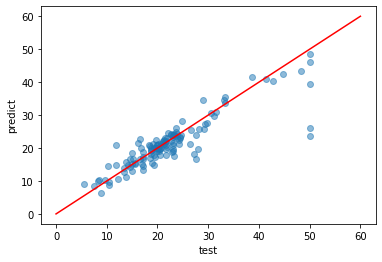

In [11]:
# 可視化

plt.scatter(y_test, pred, alpha = 0.5,)
plt.xlabel('test')
plt.ylabel('predict')
plt.plot(np.linspace(0, 60, 100), np.linspace(0, 60, 100), "red")
plt.show()

In [12]:
# 学習モデルの評価（RMSEを計算）
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(rmse)


4.293671289612845


#### 勾配ブースティング(グリッドサーチ)の評価

- RMSE = 3.1969343197990177

In [13]:
# モデルの保存
with open('xgb_boston.model', 'wb') as f:
  pickle.dump(model, f)

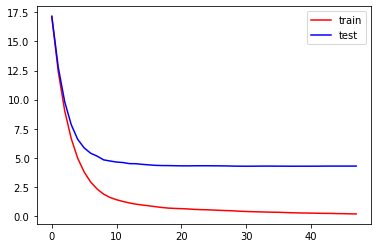

In [14]:
plt.plot(results_dict["train"]["rmse"], color = "red", label = "train")
plt.plot(results_dict["test"]["rmse"], color = "blue", label = "test")
plt.legend()
plt.show()

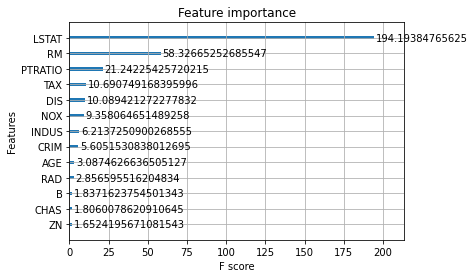

In [15]:
# 特徴量重要度のプロット
xgb.plot_importance(model, importance_type = "gain")
plt.show()

## グリッドサーチを行う

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [18]:
%%time
xgb_reg = xgb.XGBRegressor()

params=[{'max_depth':[3,4,5,6],
        'n_estimators':[100,300,500]
       }]

scorer=make_scorer(mean_squared_error)

grid_xgb_reg=GridSearchCV(xgb_reg,
                          param_grid=params,
                          scoring=scorer,
                          cv=5,
                          n_jobs=-1)

grid_xgb_reg.fit(X_train, y_train)

CPU times: user 8.41 s, sys: 165 ms, total: 8.57 s
Wall time: 28min 30s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [19]:
y_train_pred = grid_xgb_reg.predict(X_train)
y_test_pred = grid_xgb_reg.predict(X_test)

# 裁量スコアとなるパラメータ値を出力
print(grid_xgb_reg.best_params_)

{'max_depth': 6, 'n_estimators': 300}


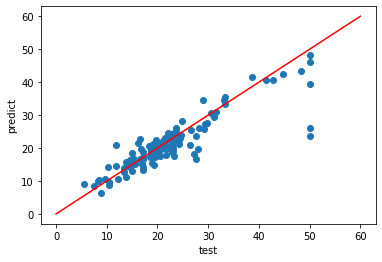

In [20]:
plt.scatter(y_test, y_test_pred)
plt.plot(np.linspace(0, 60, 100), np.linspace(0, 60, 100), "red")
plt.xlabel('test')
plt.ylabel('predict')
plt.show()

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE   train: %.3f,  test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('RMSE  train: %.3f,  test: %.3f' %(
        np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('R^2   train: %.3f,  test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE   train: 0.000,  test: 18.442
RMSE  train: 0.001,  test: 4.294
R^2   train: 1.000,  test: 0.774


In [29]:
list = X_train.columns

/home/bi18056/ml/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bi18056/ml/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 37325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bi18056/ml/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 35201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bi18056/ml/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/bi18056/ml/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/bi18056/ml/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: Ru

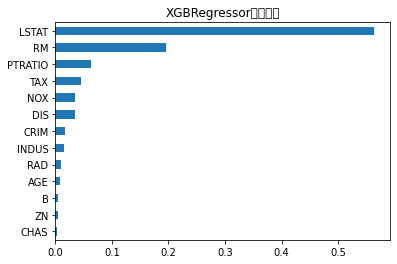

In [31]:
# 各説明変数の重要度
xgb_reg1=xgb.XGBRegressor(**grid_xgb_reg.best_params_)
xgb_reg1.fit(X_train,y_train)

# feature importance のプロット
import pandas as pd
import matplotlib.pyplot as plt
importances = pd.Series(xgb_reg1.feature_importances_, index = list)
importances = importances.sort_values()
importances.plot(kind = 'barh')
plt.title('XGBRegressorの重要度')
plt.show()